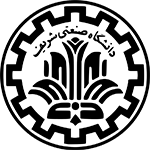

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
 Deep Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department - Fall 2025  <br>
<font color=3C99D size=5>
          Homework 4<br>
<font color=696880 size=4>

**Name**: Ali Nouri
  
**Student ID**: 401102734

# 🛢️ Oil Price Prediction using Time Series Models 📈

This notebook is designed for students to complete tasks related to oil price prediction using different machine learning models. 🚀

## 📚 References
- 📊 [Dataset: Yahoo Finance - CL=F](https://finance.yahoo.com/quote/CL=F/history/)
- 📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/2149/pdf)

## 1️⃣ Introduction
🔍 One of the most common applications of recurrent neural networks is **time series forecasting**. In this assignment, you will predict **crude oil prices** using four different methods. 💡

## 2️⃣ Dataset and Preprocessing (25 Points)

### 📥 2.1 Download Dataset
📌 Download the dataset from **Yahoo Finance** for `CL=F` from **2010 to the present**.
[Yahoo Finance - CL=F](https://finance.yahoo.com/quote/CL=F/history/)

### 🎯 2.2 Select Features
✅ Select the `Adj Close` column as the **main feature**.

### ⚠️ **2.3 Handle Missing Data**

You will encounter missing data (`null` values) within your dataset. Follow these detailed steps carefully to handle the missing values and create a complete, reliable dataset:

#### 📝 Step 1: Introduce Random Missing Data
- Identify all indices in the `Adj Close` column that currently have valid (non-null) data.
- Set a random seed (`np.random.seed(42)`) for reproducibility.
- Randomly select **10%** of these valid indices and set their values to `NaN`.

#### 🔍 Step 2: Identify Missing Values
- Identify all dates where at least one column has a missing value (`NaN`).
- Print the number of missing dates and the total number of dates to evaluate the extent of missingness.

#### 🔧 Step 3: Replace Missing Values
- Create a copy of the `Adj Close` column for filling purposes.
- First, apply **linear interpolation** to estimate missing values based on surrounding data points.
- Then, use backward fill (`bfill`) followed by forward fill (`ffill`) methods to handle any remaining missing values at the start or end of the dataset.

#### 🎯 Outcome:
After completing these steps, your dataset will have no missing values in the `Adj Close` column, ready for further analysis or modeling.

🛠 *Your task:* Implement the missing data handling methods below. (16 Points)

In [ ]:
import yfinance as yf
import pandas as pd

# Download crude oil futures data (CL=F) from 2010 to present
data = yf.download("CL=F", start="2010-01-01", auto_adjust=False)

# For futures, Adj Close is equal to Close (no dividends or splits)
data['Adj Close'] = data['Close']

# Keep only Adj Close and reset index to integer indexing
data = data[['Adj Close']].reset_index(drop=True)

# Print 5 examples
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price   Adj Close
Ticker       CL=F
0       81.510002
1       81.769997
2       83.180000
3       82.660004
4       82.750000


In [ ]:
# TO DO: Introduce random null
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Identify indices where Adj Close is NOT null
valid_indices = data[data['Adj Close'].notna()].index

# Randomly select 10% of valid indices
num_missing = int(0.1 * len(valid_indices))
missing_indices = np.random.choice(valid_indices, size=num_missing, replace=False)

# Set selected indices to NaN
data.loc[missing_indices, 'Adj Close'] = np.nan

In [ ]:
# TO DO: Identify missing dates and null values
# Identify rows (dates) with at least one missing value
missing_dates = data[data.isna().any(axis=1)]

# Print number of missing dates and total number of dates
print("Number of dates with missing values:", len(missing_dates))
print("Total number of dates:", len(data))

Number of dates with missing values: 403
Total number of dates: 4039


In [ ]:
# TO DO: Fill missing values using .interpolate or .fillna(method='bfill').fillna(method='ffill')
# Create a copy of the Adj Close column for filling purposes
filled = data['Adj Close'].copy()

# 1) Linear interpolation
filled = filled.interpolate(method='linear')

# 2) Backward fill then 3) Forward fill (new pandas-safe way)
filled = filled.bfill().ffill()

# Put it back into the dataframe
data['Adj Close'] = filled
filled_data = data.copy()

### ✂️ 2.4 Train-Test Split and Normalization
- **Split** the dataset into **training and test sets** based on the ratio given in the reference paper.
- **Normalize** the data.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/2149/pdf)

🛠 *Your task:* Implement the splitting and normalization below. (4 Points)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
def temporal_split(series, train_ratio=0.6, val_ratio=0.1):
    if isinstance(series, pd.Series):
        df = series.to_frame(name="Adj Close")
    else:
        df = series.copy()

    n = len(df)
    assert 0 < train_ratio < 1, "train_ratio must be between 0 and 1"
    assert 0 <= val_ratio < 1, "val_ratio must be between 0 and 1"
    assert train_ratio + val_ratio < 1, "train_ratio + val_ratio must be < 1"

    train_end = int(n * train_ratio)
    val_end = int(n * (train_ratio + val_ratio))

    train = df.iloc[:train_end].copy()
    val   = df.iloc[train_end:val_end].copy()
    test  = df.iloc[val_end:].copy()

    return train, val, test

train_list, val_list, test_list = [], [], []

train_list, val_list, test_list = [], [], []

train, val, test = temporal_split(filled_data)  # filled_data must have 'Adj Close'
train_list.append(train)
val_list.append(val)
test_list.append(test)

train_data = pd.concat(train_list)
val_data   = pd.concat(val_list)
test_data  = pd.concat(test_list)

scaler = MinMaxScaler()

train_data['Adj Close'] = scaler.fit_transform(train_data[['Adj Close']])

val_data['Adj Close']   = scaler.transform(val_data[['Adj Close']])
test_data['Adj Close']  = scaler.transform(test_data[['Adj Close']])

print("Training data sample:")
print(train_data.head())
print("Validation data sample:")
print(val_data.head())
print("Testing data sample:")
print(test_data.head())


Training data sample:
Price  Adj Close
Ticker      CL=F
0       0.630415
1       0.633379
2       0.649453
3       0.643525
4       0.644551
Validation data sample:
Price  Adj Close
Ticker      CL=F
2423    0.332193
2424    0.322446
2425    0.312699
2426    0.327405
2427    0.337095
Testing data sample:
Price  Adj Close
Ticker      CL=F
2827    0.375627
2828    0.401733
2829    0.389649
2830    0.377565
2831    0.382581


### 📊 2.5 Data Visualization
- **Plot a histogram** similar to **Figure 6** in the reference paper, showing the **distribution of oil prices**.

🛠 *Your task:* Implement the histogram plot below. (5 Points)

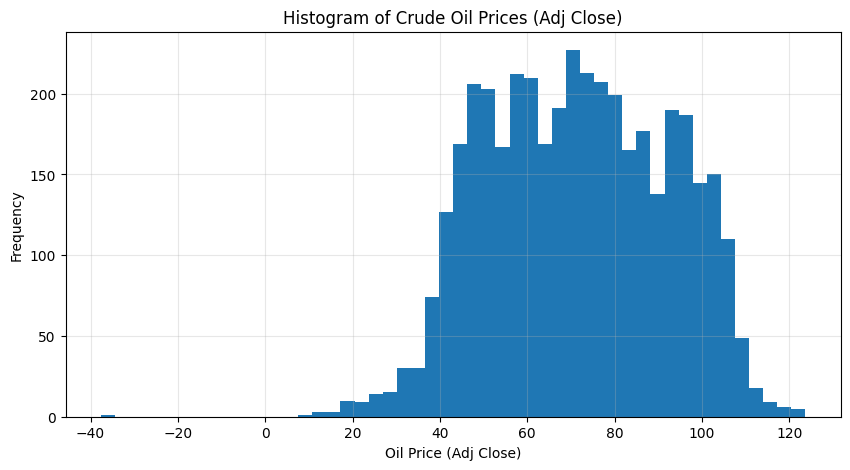

In [ ]:
# TO DO: Plot histogram of 'Adj Close'
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(filled_data['Adj Close'].dropna(), bins=50)
plt.title("Histogram of Crude Oil Prices (Adj Close)")
plt.xlabel("Oil Price (Adj Close)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

## 3️⃣ Implementing Deep Learning Models 🤖 (60 Points)

The reference paper utilizes **three models** for time series forecasting:
- `RNN`
- `LSTM`
- `GRU`

📌 **Train** each model using the **hyperparameters** given in **Table 4** of the paper.
📌 Use `Mean Square Error (MSE)` as the **loss function**.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/2149/pdf)


### Important Details & Clarifications

- **What to Predict?**  
  The goal is to predict **the actual next-day price** (regression problem), rather than just identifying price increase or decrease.
  
- **Input/Output Structure:**  
  - **Input:** A window of \( k \) consecutive daily prices (e.g., 50 days).  
  - **Output:** The predicted price for the next day.
  
- **How to Evaluate?**  
  Use the four metrics (RMSE, MAE, MAPE, \( R^2 \)) to gauge how accurately your model tracks the real price values.

- **Target Accuracy:**  
  Your accuracy might differ from the paper’s due to factors like data splitting, normalization, or different random seeds. However, aim to closely replicate the paper’s results or provide justifications for any discrepancy.

**Final Deliverables:**
1. **All four trained models** (RNN, LSTM, GRU).  
2. **Comparison plots** of predicted vs. actual values (in both normalized and original price scales, if desired).  
3. **Performance metrics** (RMSE, MAE, MAPE, \( R^2 \)) for each model, presented in a table or a concise summary.


🛠 *Your task:* Implement these models below. (30 Points)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

def create_sequences(data, window_size):
    pass
    #TO DO
    # Accept pandas Series/DataFrame, list, or numpy array
    if hasattr(data, "values"):
        arr = data.values
    else:
        arr = np.array(data)

    # If DataFrame with 1 column -> flatten
    if arr.ndim == 2 and arr.shape[1] == 1:
        arr = arr.reshape(-1)
    elif arr.ndim > 1 and arr.shape[1] != 1:
        # if multiple columns passed, take first
        arr = arr[:, 0]

    X, y = [], []
    for i in range(len(arr) - window_size):
        X.append(arr[i:i + window_size])
        y.append(arr[i + window_size])

    X = torch.tensor(np.array(X), dtype=torch.float32).unsqueeze(-1)  # (N, window, 1)
    y = torch.tensor(np.array(y), dtype=torch.float32).unsqueeze(-1)  # (N, 1)
    return X, y

window_size = 50
#TO DO: make test and train loader
batch_size = 64

X_train, y_train = create_sequences(train_data['Adj Close'], window_size)
X_test, y_test = create_sequences(test_data['Adj Close'], window_size)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)



In [ ]:
# LSTM
class LSTMModel(nn.Module):
    pass
    #TO DO
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1, dropout=0.0):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            dropout=dropout if num_layers > 1 else 0.0)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)          # out: (batch, seq, hidden)
        out = out[:, -1, :]            # last timestep
        out = self.fc(out)             # (batch, 1)
        return out

lstm_model = LSTMModel()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

def train_model(model, train_loader, test_loader, epochs=50):
    pass
    #TO DO
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(1, epochs + 1):
        # Train
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            preds = model(X_batch)
            loss = loss_fn(preds, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * X_batch.size(0)
        train_loss /= len(train_loader.dataset)

        # Evaluate
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                preds = model(X_batch)
                loss = loss_fn(preds, y_batch)
                test_loss += loss.item() * X_batch.size(0)
        test_loss /= len(test_loader.dataset)

        print(f"Epoch {epoch}/{epochs} | Train Loss: {train_loss:.6f} | Test Loss: {test_loss:.6f}")

train_model(lstm_model, train_loader, test_loader)

Epoch 1/50 | Train Loss: 0.091651 | Test Loss: 0.011308
Epoch 2/50 | Train Loss: 0.012496 | Test Loss: 0.003341
Epoch 3/50 | Train Loss: 0.002474 | Test Loss: 0.002603
Epoch 4/50 | Train Loss: 0.001590 | Test Loss: 0.001988
Epoch 5/50 | Train Loss: 0.001380 | Test Loss: 0.001897
Epoch 6/50 | Train Loss: 0.001269 | Test Loss: 0.001943
Epoch 7/50 | Train Loss: 0.001323 | Test Loss: 0.001725
Epoch 8/50 | Train Loss: 0.001192 | Test Loss: 0.001749
Epoch 9/50 | Train Loss: 0.001150 | Test Loss: 0.001719
Epoch 10/50 | Train Loss: 0.001096 | Test Loss: 0.002021
Epoch 11/50 | Train Loss: 0.001083 | Test Loss: 0.001503
Epoch 12/50 | Train Loss: 0.000934 | Test Loss: 0.001644
Epoch 13/50 | Train Loss: 0.001013 | Test Loss: 0.001452
Epoch 14/50 | Train Loss: 0.000901 | Test Loss: 0.001449
Epoch 15/50 | Train Loss: 0.000871 | Test Loss: 0.001569
Epoch 16/50 | Train Loss: 0.000780 | Test Loss: 0.001306
Epoch 17/50 | Train Loss: 0.000748 | Test Loss: 0.001273
Epoch 18/50 | Train Loss: 0.000750 | Tes

In [ ]:
class RNNModel(nn.Module):
    pass
    #TO DO
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1, dropout=0.0):
        super().__init__()
        self.rnn = nn.RNN(input_size=input_size,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True,
                          nonlinearity='tanh',
                          dropout=dropout if num_layers > 1 else 0.0)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)           # out: (batch, seq, hidden)
        out = out[:, -1, :]            # last timestep
        out = self.fc(out)             # (batch, 1)
        return out

rnn_model = RNNModel()
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
train_model(rnn_model, train_loader, test_loader)

Epoch 1/50 | Train Loss: 0.077996 | Test Loss: 0.005460
Epoch 2/50 | Train Loss: 0.002438 | Test Loss: 0.001110
Epoch 3/50 | Train Loss: 0.000622 | Test Loss: 0.001129
Epoch 4/50 | Train Loss: 0.000543 | Test Loss: 0.001039
Epoch 5/50 | Train Loss: 0.000535 | Test Loss: 0.001016
Epoch 6/50 | Train Loss: 0.000528 | Test Loss: 0.001043
Epoch 7/50 | Train Loss: 0.000524 | Test Loss: 0.000978
Epoch 8/50 | Train Loss: 0.000498 | Test Loss: 0.001046
Epoch 9/50 | Train Loss: 0.000471 | Test Loss: 0.001046
Epoch 10/50 | Train Loss: 0.000522 | Test Loss: 0.001421
Epoch 11/50 | Train Loss: 0.000445 | Test Loss: 0.000903
Epoch 12/50 | Train Loss: 0.000433 | Test Loss: 0.000912
Epoch 13/50 | Train Loss: 0.000442 | Test Loss: 0.000916
Epoch 14/50 | Train Loss: 0.000415 | Test Loss: 0.001256
Epoch 15/50 | Train Loss: 0.000464 | Test Loss: 0.001027
Epoch 16/50 | Train Loss: 0.000401 | Test Loss: 0.000910
Epoch 17/50 | Train Loss: 0.000495 | Test Loss: 0.000806
Epoch 18/50 | Train Loss: 0.000503 | Tes

In [ ]:
# GRU
class GRUModel(nn.Module):
    pass
    #TO DO
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1, dropout=0.0):
        super().__init__()
        self.gru = nn.GRU(input_size=input_size,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True,
                          dropout=dropout if num_layers > 1 else 0.0)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)           # out: (batch, seq, hidden)
        out = out[:, -1, :]            # last timestep
        out = self.fc(out)             # (batch, 1)
        return out

gru_model = GRUModel()
optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)
train_model(gru_model, train_loader, test_loader)

Epoch 1/50 | Train Loss: 0.073524 | Test Loss: 0.006372
Epoch 2/50 | Train Loss: 0.002339 | Test Loss: 0.001268
Epoch 3/50 | Train Loss: 0.000589 | Test Loss: 0.000930
Epoch 4/50 | Train Loss: 0.000478 | Test Loss: 0.000868
Epoch 5/50 | Train Loss: 0.000442 | Test Loss: 0.000860
Epoch 6/50 | Train Loss: 0.000414 | Test Loss: 0.000802
Epoch 7/50 | Train Loss: 0.000399 | Test Loss: 0.000765
Epoch 8/50 | Train Loss: 0.000381 | Test Loss: 0.000737
Epoch 9/50 | Train Loss: 0.000366 | Test Loss: 0.000753
Epoch 10/50 | Train Loss: 0.000366 | Test Loss: 0.000701
Epoch 11/50 | Train Loss: 0.000356 | Test Loss: 0.000711
Epoch 12/50 | Train Loss: 0.000338 | Test Loss: 0.000692
Epoch 13/50 | Train Loss: 0.000335 | Test Loss: 0.000658
Epoch 14/50 | Train Loss: 0.000322 | Test Loss: 0.000671
Epoch 15/50 | Train Loss: 0.000331 | Test Loss: 0.000638
Epoch 16/50 | Train Loss: 0.000317 | Test Loss: 0.000627
Epoch 17/50 | Train Loss: 0.000304 | Test Loss: 0.000659
Epoch 18/50 | Train Loss: 0.000305 | Tes

### 📈 3.1 Prediction and Evaluation
1. **Prediction:** After training, generate predictions for the test set (i.e., predict the next-day price based on the preceding \( k \) days).
2. **Visualization:** **Plot the predicted values** alongside the **actual values** for each model. This comparison helps in visually assessing each model’s performance.

🛠 **Your Task:** Implement the **visualization of predictions** (15 Points).

In [ ]:
# Predictions
def predict(model, data_loader):
    pass
    #TO DO
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    preds_list = []
    y_list = []

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            preds = model(X_batch)

            preds_list.append(preds.detach().cpu())
            y_list.append(y_batch.detach().cpu())

    preds_all = torch.cat(preds_list, dim=0).numpy()
    y_all = torch.cat(y_list, dim=0).numpy()
    return preds_all, y_all

#TO DO: predict real outputs
rnn_preds, rnn_true = predict(rnn_model, test_loader)
lstm_preds, lstm_true = predict(lstm_model, test_loader)
gru_preds, gru_true = predict(gru_model, test_loader)

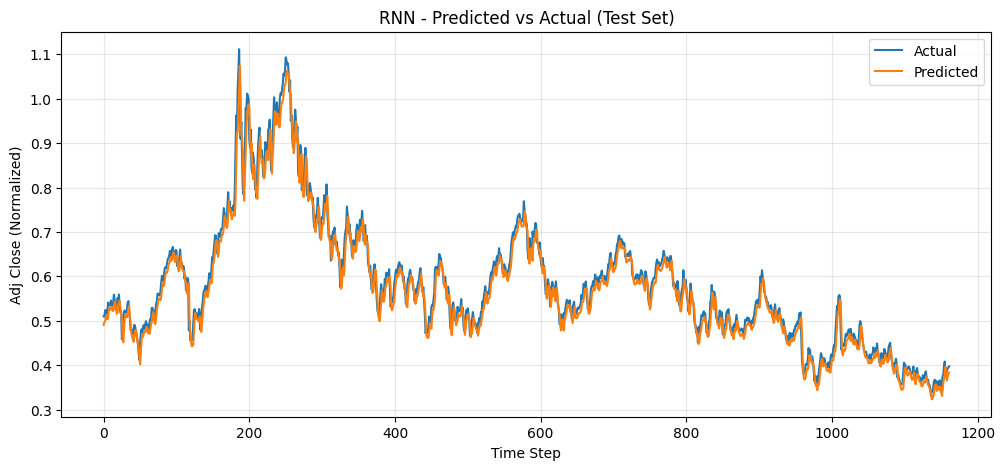

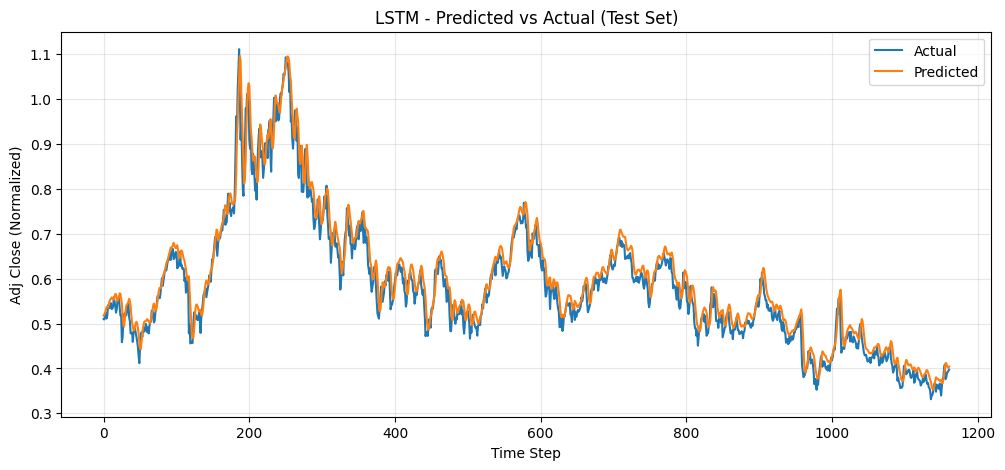

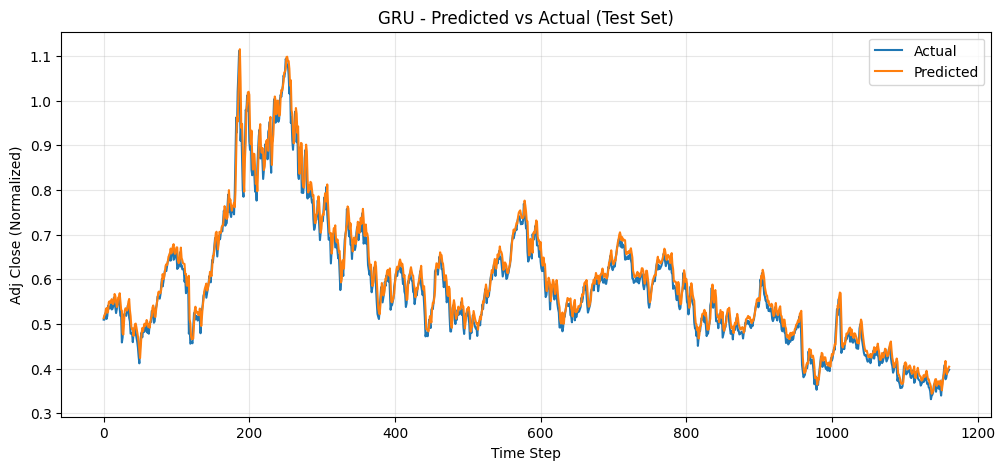

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(predictions, actual, model_name):
    pass
    #TO DO
    # Ensure 1D arrays for plotting
    predictions = np.squeeze(predictions)
    actual = np.squeeze(actual)

    plt.figure(figsize=(12, 5))
    plt.plot(actual, label="Actual")
    plt.plot(predictions, label="Predicted")
    plt.title(f"{model_name} - Predicted vs Actual (Test Set)")
    plt.xlabel("Time Step")
    plt.ylabel("Adj Close (Normalized)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

#TO DO: plot all models predictions on all data
plot_predictions(rnn_preds, rnn_true, "RNN")
plot_predictions(lstm_preds, lstm_true, "LSTM")
plot_predictions(gru_preds, gru_true, "GRU")

### 📊 3.2 Error Metrics
📌 Explain the following **error metrics** used in the paper:
- `RMSE` (Root Mean Square Error)
- `MAE` (Mean Absolute Error)
- `MAPE` (Mean Absolute Percentage Error)
- `R-Squared` (Coefficient of Determination)

**📌 Instruction:**  
Explain each of these error metrics and calculate them for **each model** (RNN, LSTM, GRU). Compare your results with the paper’s findings to see how closely they match.

🛠 *Your task:* Implement the evaluation metrics below. (15 Points)

In [ ]:
# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def calculate_metrics(predictions, actual):
    pass
    #TO DO
    predictions = np.squeeze(np.array(predictions))
    actual = np.squeeze(np.array(actual))

    rmse = np.sqrt(mean_squared_error(actual, predictions))
    mae = mean_absolute_error(actual, predictions)

    # Avoid division by zero in MAPE
    eps = 1e-8
    mape = np.mean(np.abs((actual - predictions) / (actual + eps))) * 100

    r2 = r2_score(actual, predictions)

    return {"RMSE": rmse, "MAE": mae, "MAPE(%)": mape, "R2": r2}

rnn_predictions = rnn_preds
lstm_predictions = lstm_preds
gru_predictions = gru_preds
actual_values = rnn_true
print("RNN Metrics (Unscaled):", calculate_metrics(rnn_predictions, actual_values))
print("LSTM Metrics (Unscaled):", calculate_metrics(lstm_predictions, actual_values))
print("GRU Metrics (Unscaled):", calculate_metrics(gru_predictions, actual_values))

RNN Metrics (Unscaled): {'RMSE': np.float64(0.025235696059006087), 'MAE': 0.019426722079515457, 'MAPE(%)': np.float32(3.2952032), 'R2': 0.9692657589912415}
LSTM Metrics (Unscaled): {'RMSE': np.float64(0.03221258669583604), 'MAE': 0.024316348135471344, 'MAPE(%)': np.float32(4.2790284), 'R2': 0.9499224424362183}
GRU Metrics (Unscaled): {'RMSE': np.float64(0.02473689731857173), 'MAE': 0.018050990998744965, 'MAPE(%)': np.float32(3.1182325), 'R2': 0.9704686999320984}


In [ ]:
import yfinance as yf
import pandas as pd

# Make sure `data` has full OHLCV columns (re-download if it doesn't)
need_cols = {'Open', 'High', 'Low', 'Close', 'Volume'}
if 'data' not in globals() or not isinstance(data, pd.DataFrame) or len(need_cols.intersection(set(getattr(data, "columns", [])))) < 4:
    data = yf.download("CL=F", start="2010-01-01", auto_adjust=False)

# If yfinance returns MultiIndex columns, flatten them to simple names
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

# Ensure Adj Close exists (for futures, Adj Close == Close)
if 'Adj Close' not in data.columns and 'Close' in data.columns:
    data['Adj Close'] = data['Close']

# Fill missing values for all features
filled_data = data.copy()
for column in ['Open', 'High', 'Low', 'Volume', 'Adj Close']:
    filled_data[column] = (
        filled_data[column]
        .interpolate(method='linear')
        .bfill()
        .ffill()
    )

# WE WILL USE THESE IN ARIMA PART AS INPUTS OF MODELS
train_data = filled_data.iloc[:-int(0.3 * len(filled_data))]
test_data = filled_data.iloc[-int(0.3 * len(filled_data)):]
train_target = train_data['Adj Close']
train_exog = train_data[['Open', 'High', 'Low', 'Volume']]
test_exog = test_data[['Open', 'High', 'Low', 'Volume']]

# ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_data['Adj Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")
print("The series is stationary." if result[1] < 0.05 else "The series is not stationary.")

[*********************100%***********************]  1 of 1 completed


ADF Statistic: -1.6363512738953023
p-value: 0.46416798739398024
Critical Values: {'1%': np.float64(-3.4326701915468574), '5%': np.float64(-2.862565099580858), '10%': np.float64(-2.567315691508752)}
The series is not stationary.


## 4️⃣ ARIMA Model 📉 (15 Points)

📌 Explain the **difference** between `ARIMA` and `SARIMA` models.

📌 List the **advantages** and **limitations** of `ARIMA`.

📌 Explain the **mathematical formulation** of `ARIMA`, including its **parameters**.

📌 Determine the **optimal parameters** for `ARIMA` and **report the results**.

📌 Compare the results with **Table 6** from the paper.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/21497)

🛠 *Your task:* Implement the ARIMA model below.

In [ ]:
# Train ARIMA model using auto_arima
!pip install -q pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

#TO DO:Find optimal arima model using auto_arima
arima_model = auto_arima(
    train_target,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    seasonal=False,
    d=None,                 # let auto_arima choose d
    stepwise=True,
    trace=True,
    suppress_warnings=True,
    error_action="ignore"
)

print(f"Optimal ARIMA Order: {arima_model.order}")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11771.539, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11600.517, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11583.055, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11769.586, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11584.238, Time=0.70 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11584.306, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11587.044, Time=0.80 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11581.147, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11582.333, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11582.401, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11598.593, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11585.135, Time=0.70 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.391 seconds
Optimal ARIMA Order: (0, 1, 1)


In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from tqdm import tqdm
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="statsmodels")

#TO DO: Predinct Arima outputs
order = arima_model.order

history = list(train_target.astype(float).values)
preds = []

for t in tqdm(range(len(test_data))):
    model = ARIMA(history, order=order)
    model_fit = model.fit()

    yhat = model_fit.forecast(steps=1)[0]   # one-step ahead forecast
    preds.append(yhat)

    # update with actual observed value
    history.append(float(test_data['Adj Close'].iloc[t]))

arima_forecast = pd.Series(preds, index=test_data.index, name="ARIMA_Prediction")
print(arima_forecast.head())

100%|██████████| 1211/1211 [04:26<00:00,  4.54it/s]

Date
2021-04-01    59.584848
2021-04-05    60.948764
2021-04-06    59.268537
2021-04-07    59.313465
2021-04-08    59.647123
Name: ARIMA_Prediction, dtype: float64


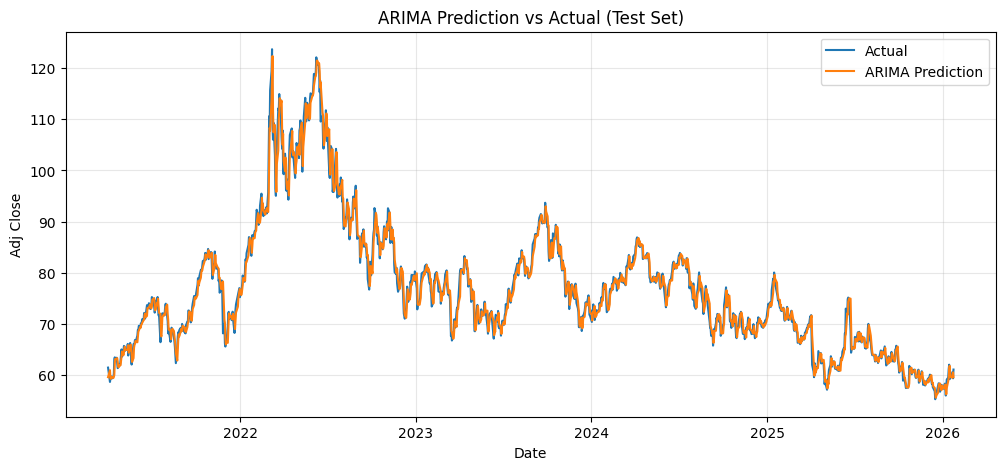

In [ ]:
#TO DO: Plot ARIMA vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(test_data.index, test_data['Adj Close'], label="Actual", linewidth=1.5)
plt.plot(arima_forecast.index, arima_forecast.values, label="ARIMA Prediction",
         linewidth=1.5)
plt.title("ARIMA Prediction vs Actual (Test Set)")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()